In [53]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
image_file = "/n01/data/nlp_aeac/mostofa_env/INPUT/IMAGES/CAMC_IB_Nancy Nunn_Claim # 21858131287.pdf/CAMC_IB_Nancy Nunn_Claim # 21858131287_11.jpg"
img = cv2.imread(image_file)


In [54]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()
    

    
################ GRAY SCALE CONVERSION ###########    
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    



################ Noise Removal ###########
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)


########### Dilation and Erosion ##########
#######
#######
#######
########### Making the front THIN ########
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)



########### Making the front THICK ########
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)




########### DETECTING SKEW ########
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle




############## Rotate the image around its center ###############
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage



############### Deskew image ###############
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)



############### REMMOVING BORDERS ###############
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

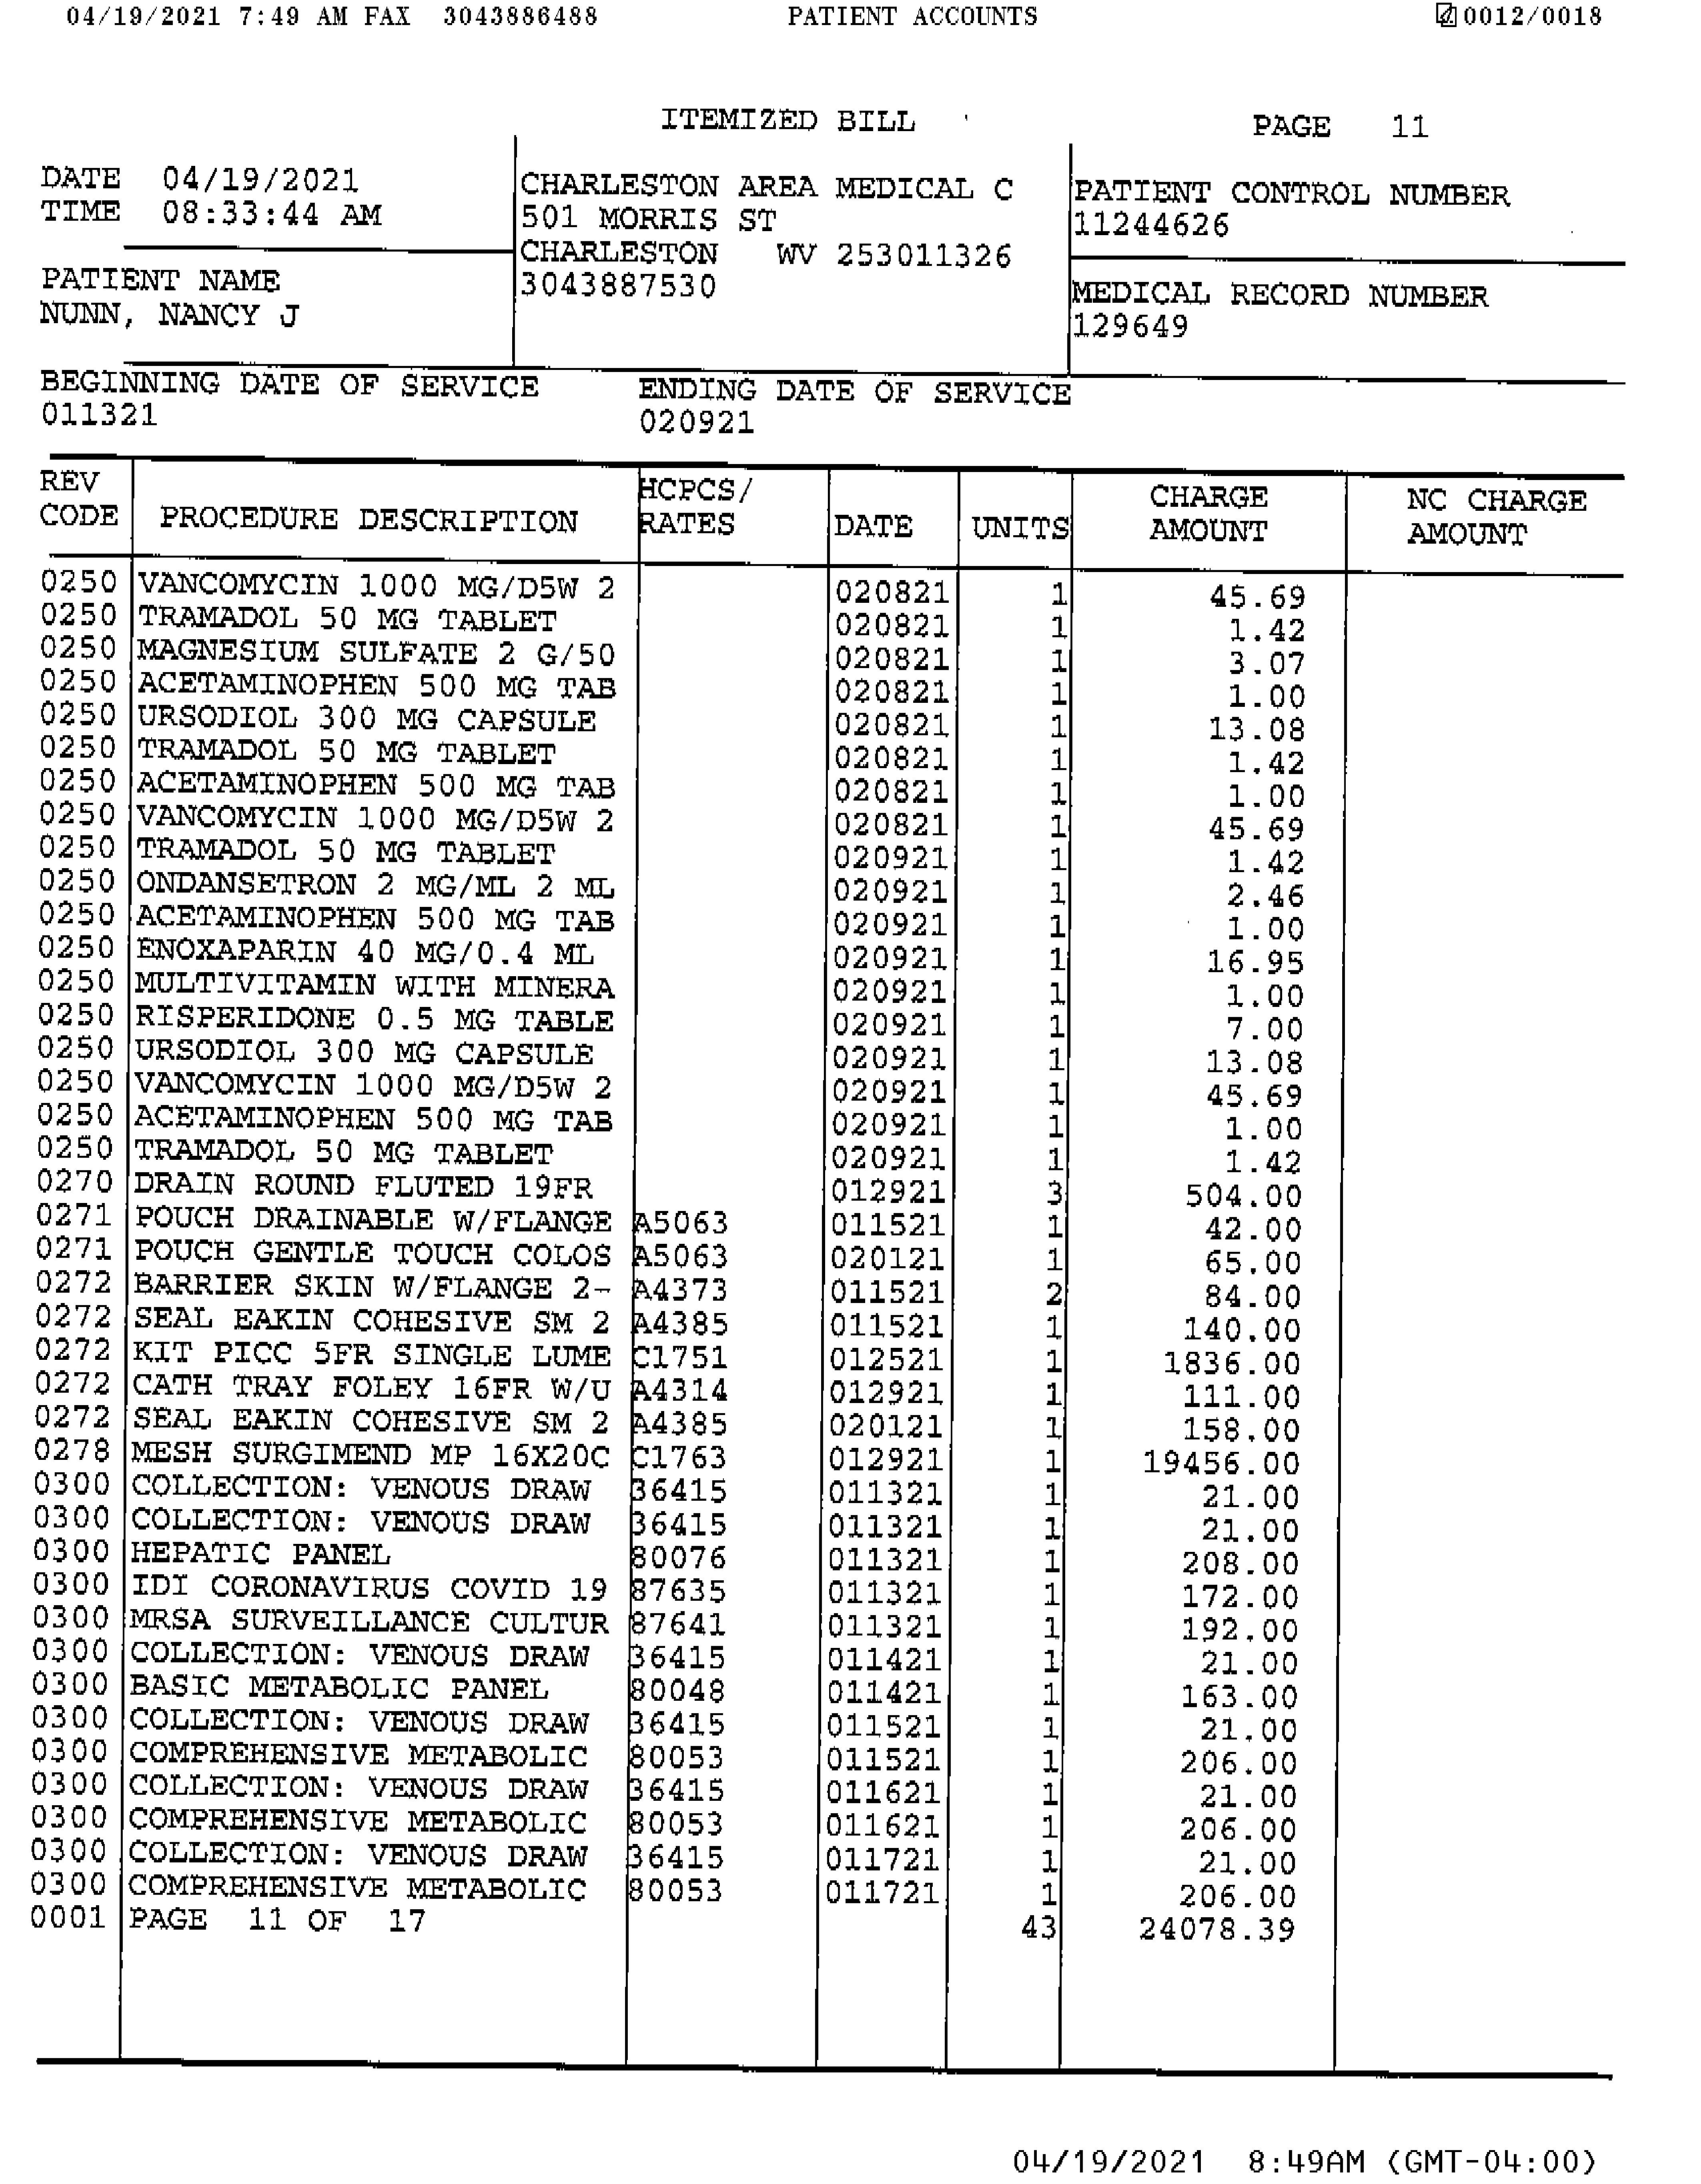

In [55]:
display(image_file)

In [56]:
########## Applying Grayscle Conversion Technique #########

gray_image = grayscale(img)
thresh, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
# cv2.imwrite("temp/gray.jpg", gray_image)
# display("temp/gray.jpg")

In [57]:
########## Applying Noise Removal Technique #########


no_noise = noise_removal(im_bw)
# cv2.imwrite("temp/no_noise.jpg", no_noise)
# display("temp/no_noise.jpg")

In [58]:
#################  Applying Thin Front ####################

eroded_image = thin_font(no_noise)
# # cv2.imwrite("temp/eroded_image.jpg", eroded_image)
# # display("temp/eroded_image.jpg")

In [59]:

#################  Applying Thick Front ####################

# dilated_image = thick_font(no_noise)
# cv2.imwrite("temp/dilated_image.jpg", dilated_image)
# display("temp/dilated_image.jpg")

In [60]:
#################  Applying Border Removal ####################

no_borders = remove_borders(eroded_image)
# cv2.imwrite("temp/no_borders.jpg", no_borders)
# display('temp/no_borders.jpg')

In [ ]:
image = cv2.imread(f)
# image = cv2.resize(image,(800,600))
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# cv2.imshow('binary_1.jpg', image_gray)
cv2.imwrite("temp/binary_1.jpg", image_gray)
display('temp/binary_1.jpg')

In [ ]:
# hist = cv2.calcHist([image_gray],[0],None,[255],[0,255])
# # print(hist)
# within = []
# for i in range(len(hist)):
#     x,y = np.split(hist,[i])
#     x1 = np.sum(x)/(image.shape[0]*image.shape[1])
#     y1 = np.sum(y)/(image.shape[0]*image.shape[1])
#     x2 = np.sum([ j*t for j,t in enumerate(x)])/np.sum(x)
#     y2 = np.sum([ j*t for j,t in enumerate(y)])/np.sum(y)
#     x3 = np.sum([ (j-x2)**2*t for j,t in enumerate(x)])/np.sum(x)
#     x3 = np.nan_to_num(x3)
#     y3 = np.sum([ (j-y2)**2*t for j,t in enumerate(y)])/np.sum(y)
#     y3 = np.nan_to_num(y3)
#     within.append(x1*x3 + y1*y3)
# m = np.argmin(within)
# print(m)
# (thresh, Bin) = cv2.threshold(image_gray,m,255,cv2.THRESH_BINARY)
# # cv2.imshow("Binary_OTSU", Bin)
# cv2.imwrite("temp/binary_otsu.jpg", Bin)
# display('temp/binary_otsu.jpg')

In [ ]:
# adp_thresholding = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)
# cv2.imwrite("temp/binary_adap.jpg", adp_thresholding)
# display('temp/binary_adap.jpg')

ret, cv_otsu_binary = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite("temp/binary_cv_otsu_binary.jpg", cv_otsu_binary)
display('temp/binary_cv_otsu_binary.jpg')

# kernel_erosion = np.ones((3,3), np.uint8)
kernel_dilation = np.ones((1,1), np.uint8)
# erosion = cv2.erode(th2, kernel_erosion, iterations=1)
# dilation = cv2.dilate(erosion, kernel_dilation, iterations=1)
dilation = cv2.dilate(cv_otsu_binary, kernel_dilation, iterations=1)
cv2.imwrite("temp/binary_er_di.jpg", dilation)
display('temp/binary_er_di.jpg')

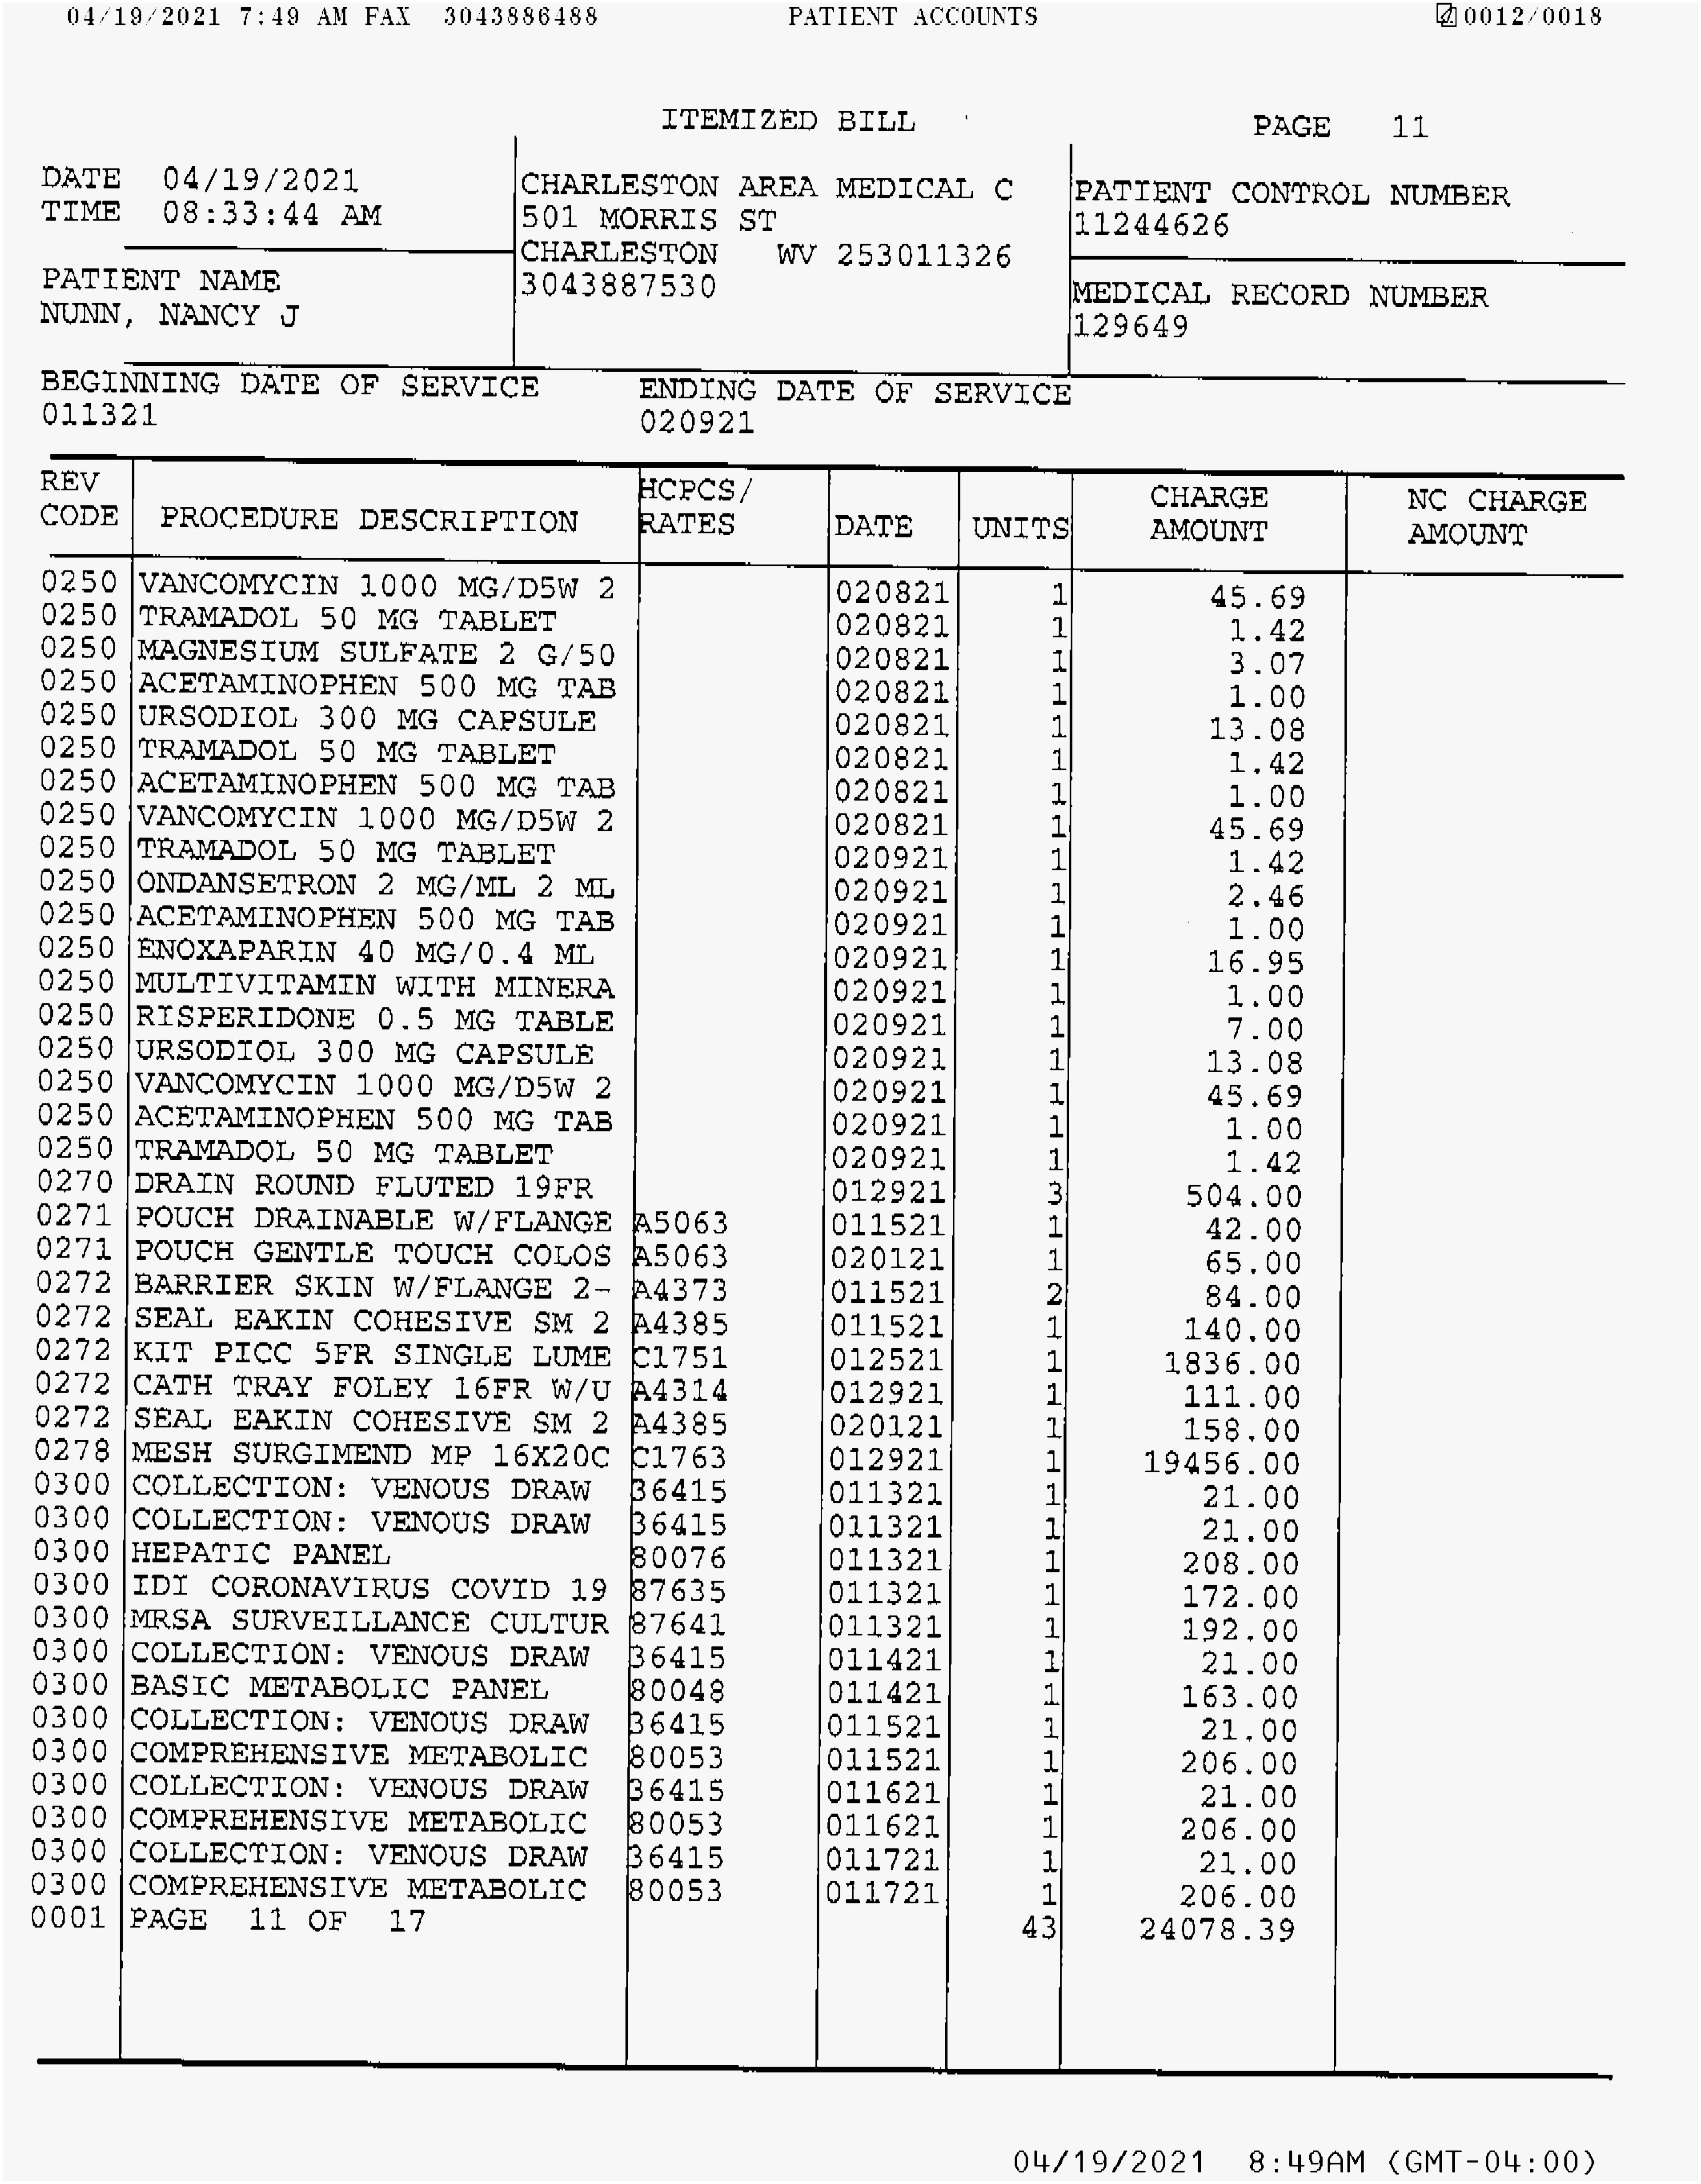

In [61]:
cv2.imwrite("temp/no_borders.jpg", no_borders)
display('temp/no_borders.jpg')

In [62]:
# no_borders.save(r'/n01/data/nlp_aeac/mostofa_env/temp/Betsy Stewart_Claim # 21740462937_4.pdf')
cv2.imwrite('temp/CAMC_IB_Nancy Nunn_Claim # 21858131287_11.jpg', no_borders)

True

In [64]:
from PIL import Image

image1 = Image.open(r'/n01/data/nlp_aeac/mostofa_env/IBR/temp/CAMC_IB_Nancy Nunn_Claim # 21858131287_11.jpg')
# im1 = image1.convert('RGB')
image1.save(r'/n01/data/nlp_aeac/mostofa_env/INPUT/CLEAN_PDF/CAMC_IB_Nancy Nunn_Claim # 21858131287_11.pdf')